### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [6]:
import pandas as pd

# URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los DataFrames desde las URLs
df1 = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

# Agregar la columna "Tienda"
df1["Tienda"] = "Tienda 1"
df2["Tienda"] = "Tienda 2"
df3["Tienda"] = "Tienda 3"
df4["Tienda"] = "Tienda 4"

# Unir todos los datos
df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado para verificar
print(df_total.head())

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

In [2]:
import pandas as pd

# Subir archivos en Colab manualmente
from google.colab import files
uploaded = files.upload()


Saving tienda_1 .csv to tienda_1 .csv
Saving tienda_2.csv to tienda_2.csv
Saving tienda_3.csv to tienda_3.csv
Saving tienda_4.csv to tienda_4.csv


#1. Análisis de facturación



In [8]:
df_total["Facturación"] = df_total["Precio"] + df_total["Costo de envío"]

# Agrupar por tienda
facturacion_por_tienda = df_total.groupby("Tienda")["Facturación"].sum()
print(facturacion_por_tienda)



Tienda
Tienda 1    1.212258e+09
Tienda 2    1.175829e+09
Tienda 3    1.156536e+09
Tienda 4    1.093693e+09
Name: Facturación, dtype: float64


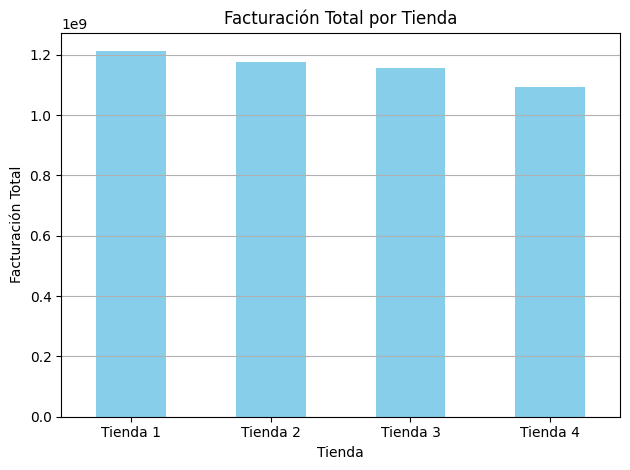

In [9]:
import matplotlib.pyplot as plt

facturacion_por_tienda.plot(kind="bar", title="Facturación Total por Tienda", color="skyblue")
plt.ylabel("Facturación Total")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 2. Ventas por categoría

In [10]:
# Contar la cantidad de productos vendidos por categoría
ventas_por_categoria = df_total["Categoría del Producto"].value_counts()
print(ventas_por_categoria)


Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


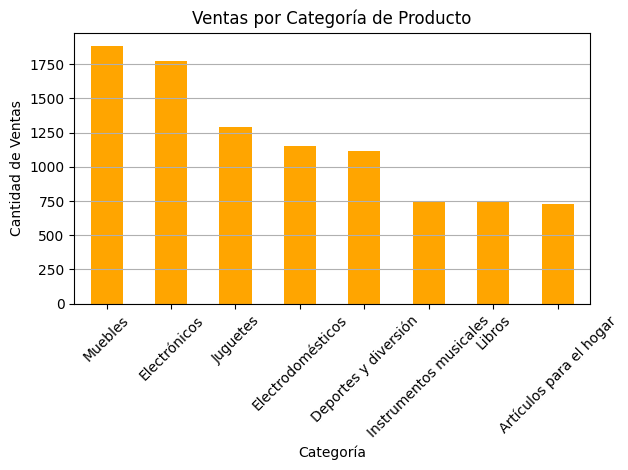

In [11]:
ventas_por_categoria.plot(kind="bar", title="Ventas por Categoría de Producto", color="orange")
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 3. Calificación promedio de la tienda


In [12]:
calificacion_promedio_general = df_total["Calificación"].mean()
print(f"Calificación promedio general de todas las tiendas: {calificacion_promedio_general:.2f}")


Calificación promedio general de todas las tiendas: 4.01


In [13]:
calificacion_por_tienda = df_total.groupby("Tienda")["Calificación"].mean()
print(calificacion_por_tienda)


Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


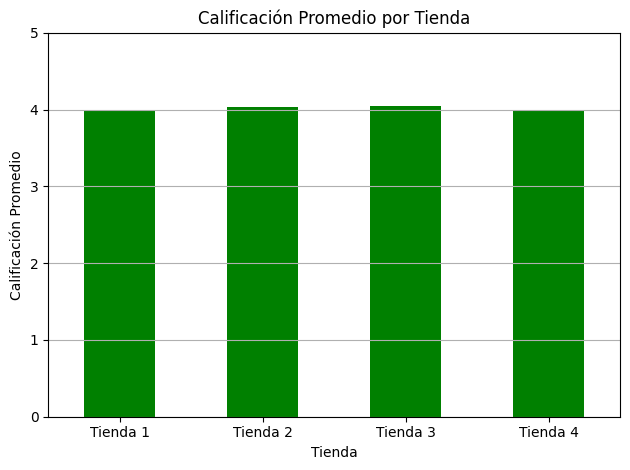

In [14]:
calificacion_por_tienda.plot(kind="bar", title="Calificación Promedio por Tienda", color="green")
plt.ylabel("Calificación Promedio")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.ylim(0, 5)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 4. Productos más y menos vendidos

In [15]:
ventas_por_producto = df_total["Producto"].value_counts()
print("Productos más vendidos:")
print(ventas_por_producto.head())

print("\nProductos menos vendidos:")
print(ventas_por_producto.tail())


Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


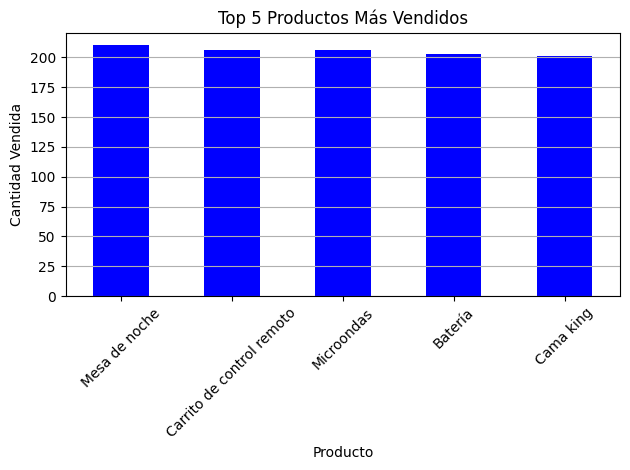

In [16]:
ventas_por_producto.head(5).plot(kind="bar", title="Top 5 Productos Más Vendidos", color="blue")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


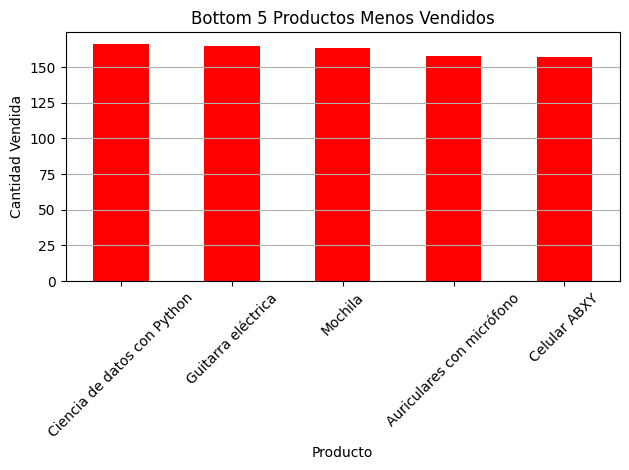

In [17]:
ventas_por_producto.tail(5).plot(kind="bar", title="Bottom 5 Productos Menos Vendidos", color="red")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 5. Envío promedio por tienda

In [18]:
envio_promedio_por_tienda = df_total.groupby("Tienda")["Costo de envío"].mean()
print(envio_promedio_por_tienda)


Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


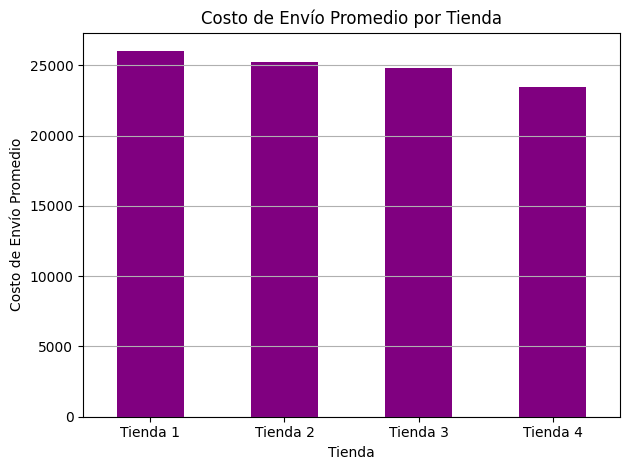

In [19]:
envio_promedio_por_tienda.plot(kind="bar", title="Costo de Envío Promedio por Tienda", color="purple")
plt.ylabel("Costo de Envío Promedio")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


Si tu objetivo es cerrar la tienda con menor retorno económico, Tienda 4 sería la mejor candidata.

